---
## Project : 하루시작 지하철 혼잡도 분석 02 
## Description : 
    - 서울 교통공사 역별 일별 시간대별 승하차인원 정보
    [source link] (https://data.seoul.go.kr/dataList/OA-12921/F/1/datasetView.do#)
    
## Author : SHIN
## Date : 2024.05.31 ~
## Detail : 
## Update: 
    - 2024.06.02 pdg : 일별 데이터 정제 
        - 기존 테스트 데이터 의 일별 데이터가 없는 부분 참고하여 일별 데이터 추출 및 데이터 칼럼 정제를 시작.
    - 2024.06.05 snr : 주차별 시간대에 대한 승차인원수 그래프


In [103]:
import pandas as pd ,numpy as  np # Data manipulatioin
import seaborn as sns,matplotlib.pyplot as plt # visiulization
import warnings;warnings.filterwarnings('ignore') # 경고 무시 
# 기본 세팅
def plotSetting(pltStyle):
    import matplotlib.pyplot as plt # visiulization
    import platform
    from matplotlib import font_manager, rc # rc : 폰트 변경 모듈font_manager : 폰트 관리 모듈
    plt.style.use(pltStyle)
    plt.rcParams['axes.unicode_minus'] = False# unicode 설정
    if platform.system() == 'Darwin': rc('font', family='AppleGothic') # os가 macos
    elif platform.system() == 'Windows': # os가 windows
        path = 'c:/Windows/Fonts/malgun.ttf' 
        font_name = font_manager.FontProperties(fname=path).get_name()
        rc('font', family=font_name)
    else:
        print("Unknown System")
    print("___## OS platform 한글 세팅완료 ## ___")
# graph style seaborn
plotSetting("seaborn-v0_8")


___## OS platform 한글 세팅완료 ## ___


In [104]:
data=pd.read_csv('../Data/FinalDataset/2022-01-01 ~2022-12-31_dataset.csv', index_col=False)
data.shape

data_ride = data[data['승하차구분'] == '승차'].iloc[:, 7:27]
data_down = data[data['승하차구분'] == '하차'].iloc[:, 7:27]

data_ride.head()


,05,06,07,08,09,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24
0,6,7,20,17,37,58,45,39,53,62,90,90,103,45,29,26,26,7,2,0.0
2,8,15,21,56,34,60,46,47,84,88,102,111,118,60,43,28,17,7,5,0.0
4,61,273,597,462,128,80,49,77,67,62,55,77,82,84,31,24,17,8,3,0.0
6,60,238,682,432,121,52,56,61,65,54,67,110,104,68,39,25,26,17,6,0.0
8,59,224,614,456,130,53,53,91,66,57,80,73,104,74,37,29,25,4,4,0.0


In [105]:
subway_7호선 = data[data['호선'] == '7호선']
subway_7호선.head()

,Unnamed: 0,연번,수송일자,호선,역사코드,역명,승하차구분,05,06,07,...,15시,16시,17시,18시,19시,20시,21시,22시,23시,24시
0,0,425,2022-01-01,7호선,2711,장암,승차,6,7,20,...,5.0,4.5,4.5,6.0,5.0,4.5,4.0,2.0,3.0,0.0
1,1,426,2022-01-01,7호선,2711,장암,하차,2,18,9,...,5.0,4.5,4.5,6.0,5.0,4.5,4.0,2.0,3.0,0.0
2,2,969,2022-01-02,7호선,2711,장암,승차,8,15,21,...,5.0,4.5,4.5,6.0,5.0,4.5,4.0,2.0,3.0,0.0
3,3,970,2022-01-02,7호선,2711,장암,하차,2,9,20,...,5.0,4.5,4.5,6.0,5.0,4.5,4.0,2.0,3.0,0.0
4,4,1513,2022-01-03,7호선,2711,장암,승차,61,273,597,...,5.0,4.5,4.5,6.0,5.0,4.5,4.0,2.0,3.0,0.0


In [106]:
# 수송일자 날짜형으로 변환
import pandas as pd

## 요일 변경 갯수 확인 13594개
print(len(pd.to_datetime(subway_7호선['수송일자'], format='%Y-%m-%d').dt.day_name()))
print(len(subway_7호선)) 


## 요일 컬럼 생성
subway_7호선['요일'] = pd.to_datetime(subway_7호선['수송일자'], format='%Y-%m-%d').dt.day_name().values
subway_7호선.info() ## 요일 null값 체크 -> 이상없음

# 요일을 영어에서 한국어로 변환
day_name_mapping = {
    'Sunday': 0,
    'Monday': 1,
    'Tuesday': 2,
    'Wednesday': 3,
    'Thursday': 4,
    'Friday': 5,
    'Saturday': 6
}


subway_7호선['요일'] = subway_7호선['요일'].map(day_name_mapping)


30678
30678
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30678 entries, 0 to 30677
Data columns (total 53 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  30678 non-null  int64  
 1   연번          30678 non-null  int64  
 2   수송일자        30678 non-null  object 
 3   호선          30678 non-null  object 
 4   역사코드        30678 non-null  int64  
 5   역명          30678 non-null  object 
 6   승하차구분       30678 non-null  object 
 7   05          30678 non-null  int64  
 8   06          30678 non-null  int64  
 9   07          30678 non-null  int64  
 10  08          30678 non-null  int64  
 11  09          30678 non-null  int64  
 12  10          30678 non-null  int64  
 13  11          30678 non-null  int64  
 14  12          30678 non-null  int64  
 15  13          30678 non-null  int64  
 16  14          30678 non-null  int64  
 17  15          30678 non-null  int64  
 18  16          30678 non-null  int64  
 19  17          3

In [107]:
import holidays

kr_holidays = holidays.KR()
subway_7호선['공휴일여부'] = subway_7호선['수송일자'].apply(lambda x: 0 if x in kr_holidays else 1)
subway_7호선.head()

,Unnamed: 0,연번,수송일자,호선,역사코드,역명,승하차구분,05,06,07,...,15시,16시,17시,18시,19시,20시,21시,22시,23시,24시
0,0,425,2022-01-01,7호선,2711,장암,승차,6,7,20,...,5.0,4.5,4.5,6.0,5.0,4.5,4.0,2.0,3.0,0.0
1,1,426,2022-01-01,7호선,2711,장암,하차,2,18,9,...,5.0,4.5,4.5,6.0,5.0,4.5,4.0,2.0,3.0,0.0
2,2,969,2022-01-02,7호선,2711,장암,승차,8,15,21,...,5.0,4.5,4.5,6.0,5.0,4.5,4.0,2.0,3.0,0.0
3,3,970,2022-01-02,7호선,2711,장암,하차,2,9,20,...,5.0,4.5,4.5,6.0,5.0,4.5,4.0,2.0,3.0,0.0
4,4,1513,2022-01-03,7호선,2711,장암,승차,61,273,597,...,5.0,4.5,4.5,6.0,5.0,4.5,4.0,2.0,3.0,0.0


In [108]:
subway_7호선_도봉산 = subway_7호선[subway_7호선['역명'] == '도봉산']
subway_7호선_도봉산

,Unnamed: 0,연번,수송일자,호선,역사코드,역명,승하차구분,05,06,07,...,15시,16시,17시,18시,19시,20시,21시,22시,23시,24시
626,626,427,2022-01-01,7호선,2712,도봉산,승차,63,99,135,...,10.0,10.0,12.5,14.5,13.0,12.0,10.0,8.0,6.0,1.0
627,627,428,2022-01-01,7호선,2712,도봉산,하차,22,136,109,...,10.0,10.0,12.5,14.5,13.0,12.0,10.0,8.0,6.0,1.0
628,628,971,2022-01-02,7호선,2712,도봉산,승차,60,73,152,...,10.0,10.0,12.5,14.5,13.0,12.0,10.0,8.0,6.0,1.0
629,629,972,2022-01-02,7호선,2712,도봉산,하차,17,71,89,...,10.0,10.0,12.5,14.5,13.0,12.0,10.0,8.0,6.0,1.0
630,630,1515,2022-01-03,7호선,2712,도봉산,승차,199,788,2269,...,10.0,10.0,12.5,14.5,13.0,12.0,10.0,8.0,6.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26495,26495,190780,2022-12-16,7호선,2712,도봉산,하차,37,182,307,...,10.0,10.0,10.0,10.0,10.0,10.0,9.0,8.0,5.0,1.0
26496,26496,194601,2022-12-23,7호선,2712,도봉산,승차,177,620,2034,...,10.0,10.0,10.0,10.0,10.0,10.0,9.0,8.0,5.0,1.0
26497,26497,194602,2022-12-23,7호선,2712,도봉산,하차,25,161,236,...,10.0,10.0,10.0,10.0,10.0,10.0,9.0,8.0,5.0,1.0
26498,26498,198419,2022-12-30,7호선,2712,도봉산,승차,188,536,1718,...,10.0,10.0,10.0,10.0,10.0,10.0,9.0,8.0,5.0,1.0


In [109]:
subway_7호선_도봉산_승차2=subway_7호선_도봉산[subway_7호선_도봉산['승하차구분'] == '승차']
subway_7호선_도봉산_승차2

,Unnamed: 0,연번,수송일자,호선,역사코드,역명,승하차구분,05,06,07,...,15시,16시,17시,18시,19시,20시,21시,22시,23시,24시
626,626,427,2022-01-01,7호선,2712,도봉산,승차,63,99,135,...,10.0,10.0,12.5,14.5,13.0,12.0,10.0,8.0,6.0,1.0
628,628,971,2022-01-02,7호선,2712,도봉산,승차,60,73,152,...,10.0,10.0,12.5,14.5,13.0,12.0,10.0,8.0,6.0,1.0
630,630,1515,2022-01-03,7호선,2712,도봉산,승차,199,788,2269,...,10.0,10.0,12.5,14.5,13.0,12.0,10.0,8.0,6.0,1.0
632,632,2061,2022-01-04,7호선,2712,도봉산,승차,169,705,2247,...,10.0,10.0,12.5,14.5,13.0,12.0,10.0,8.0,6.0,1.0
634,634,2609,2022-01-05,7호선,2712,도봉산,승차,191,691,2209,...,10.0,10.0,12.5,14.5,13.0,12.0,10.0,8.0,6.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26490,26490,183131,2022-12-02,7호선,2712,도봉산,승차,210,718,2187,...,10.0,10.0,10.0,10.0,10.0,10.0,9.0,8.0,5.0,1.0
26492,26492,186959,2022-12-09,7호선,2712,도봉산,승차,203,664,2157,...,10.0,10.0,10.0,10.0,10.0,10.0,9.0,8.0,5.0,1.0
26494,26494,190779,2022-12-16,7호선,2712,도봉산,승차,209,648,2121,...,10.0,10.0,10.0,10.0,10.0,10.0,9.0,8.0,5.0,1.0
26496,26496,194601,2022-12-23,7호선,2712,도봉산,승차,177,620,2034,...,10.0,10.0,10.0,10.0,10.0,10.0,9.0,8.0,5.0,1.0


In [110]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split

# 가상의 데이터셋 예시
# 데이터를 로드하고 필요한 열을 선택합니다.
# data_column: 요일, 년도, 월, 주차, 공휴일여부
# test_column: 05, 06, 07, 08, 09, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24

# 데이터 로드
data_column = ['요일', '년도', '월', '주차', '공휴일여부']
test_column = ['05', '06', '07', '08', '09', '10', '11', '12', '13', '14', '15', '16', '17', '18', '19', '20', '21', '22', '23', '24']

data = subway_7호선_도봉산_승차2[data_column]
target = subway_7호선_도봉산_승차2[test_column]

train_input, test_input, train_target, test_target = train_test_split(data, target, test_size=0.2, random_state=42)


In [111]:
from sklearn.multioutput import MultiOutputRegressor
from sklearn.neighbors import KNeighborsRegressor

# KNeighborsRegressor 모델 정의
knn_regressor = KNeighborsRegressor(n_neighbors=5)

# MultiOutputRegressor를 사용하여 다중 출력 회귀 모델 생성
multi_output_regressor = MultiOutputRegressor(knn_regressor)

# 모델 훈련
multi_output_regressor.fit(train_input, train_target)


MultiOutputRegressor(estimator=KNeighborsRegressor())

In [187]:
# 모델 평가
score = multi_output_regressor.score(test_input, test_target)
print(f'Model score: {score}')

# 예측 수행
predictions = multi_output_regressor.predict(test_input)

# 예측 결과 일부 확인
print(predictions[:5])



ValueError: X has 1 features, but KNeighborsRegressor is expecting 5 features as input.

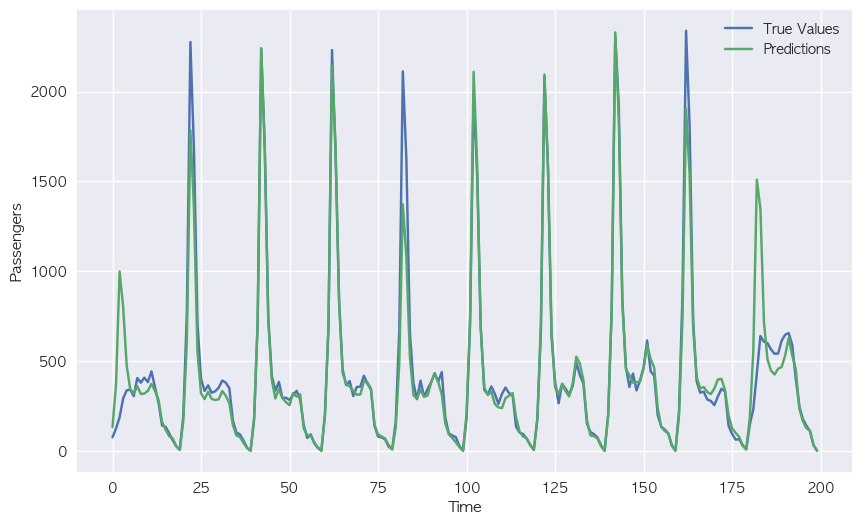

In [113]:
import matplotlib.pyplot as plt

# 일부 예측 결과 시각화
plt.figure(figsize=(10, 6))
plt.plot(test_target.values[:10].flatten(), label='True Values')
plt.plot(predictions[:10].flatten(), label='Predictions')
plt.xlabel('Time')
plt.ylabel('Passengers')
plt.legend()
plt.show()


-------

In [114]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier

# 가상의 데이터셋 예시
# 데이터를 로드하고 필요한 열을 선택합니다.
# data_column: 요일, 년도, 월, 주차, 공휴일여부
# test_column: 05, 06, 07, 08, 09, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24

# 데이터 로드
score = []
testLists = ['06', '07', '08', '09', '17', '18', '19', '20', '21', '22']
data_column = ['요일', '년도', '월', '주차', '공휴일여부']

for test_column in testLists :

    data = subway_7호선_도봉산_승차2[data_column]
    target = subway_7호선_도봉산_승차2[test_column]

    train_input, test_input, train_target, test_target = train_test_split(data, target, test_size=0.2, random_state=42)

    kn = KNeighborsClassifier(n_neighbors=7)
    kn.fit(train_input, train_target)
    score.append(kn.score(test_input, test_target))
print("gg")


gg


-------

In [115]:
import seaborn as sns

In [116]:
subway_7호선_도봉산.head()

,Unnamed: 0,연번,수송일자,호선,역사코드,역명,승하차구분,05,06,07,...,15시,16시,17시,18시,19시,20시,21시,22시,23시,24시
626,626,427,2022-01-01,7호선,2712,도봉산,승차,63,99,135,...,10.0,10.0,12.5,14.5,13.0,12.0,10.0,8.0,6.0,1.0
627,627,428,2022-01-01,7호선,2712,도봉산,하차,22,136,109,...,10.0,10.0,12.5,14.5,13.0,12.0,10.0,8.0,6.0,1.0
628,628,971,2022-01-02,7호선,2712,도봉산,승차,60,73,152,...,10.0,10.0,12.5,14.5,13.0,12.0,10.0,8.0,6.0,1.0
629,629,972,2022-01-02,7호선,2712,도봉산,하차,17,71,89,...,10.0,10.0,12.5,14.5,13.0,12.0,10.0,8.0,6.0,1.0
630,630,1515,2022-01-03,7호선,2712,도봉산,승차,199,788,2269,...,10.0,10.0,12.5,14.5,13.0,12.0,10.0,8.0,6.0,1.0


In [117]:
# 도봉산 데이터에서 승차/하차를 구분한 뒤, 주차에 따른 05시에 인원수 
subway_7호선_도봉산_승차 = subway_7호선_도봉산[subway_7호선_도봉산['승하차구분'] == '승차']

In [118]:
subway_7호선_도봉산_승차.head()

,Unnamed: 0,연번,수송일자,호선,역사코드,역명,승하차구분,05,06,07,...,15시,16시,17시,18시,19시,20시,21시,22시,23시,24시
626,626,427,2022-01-01,7호선,2712,도봉산,승차,63,99,135,...,10.0,10.0,12.5,14.5,13.0,12.0,10.0,8.0,6.0,1.0
628,628,971,2022-01-02,7호선,2712,도봉산,승차,60,73,152,...,10.0,10.0,12.5,14.5,13.0,12.0,10.0,8.0,6.0,1.0
630,630,1515,2022-01-03,7호선,2712,도봉산,승차,199,788,2269,...,10.0,10.0,12.5,14.5,13.0,12.0,10.0,8.0,6.0,1.0
632,632,2061,2022-01-04,7호선,2712,도봉산,승차,169,705,2247,...,10.0,10.0,12.5,14.5,13.0,12.0,10.0,8.0,6.0,1.0
634,634,2609,2022-01-05,7호선,2712,도봉산,승차,191,691,2209,...,10.0,10.0,12.5,14.5,13.0,12.0,10.0,8.0,6.0,1.0


### 도봉산 승차 데이터 -> 주차에 따른 05시의 인원수

### 요일도 찍어보고, 공휴일여부 

<Figure size 1400x500 with 0 Axes>

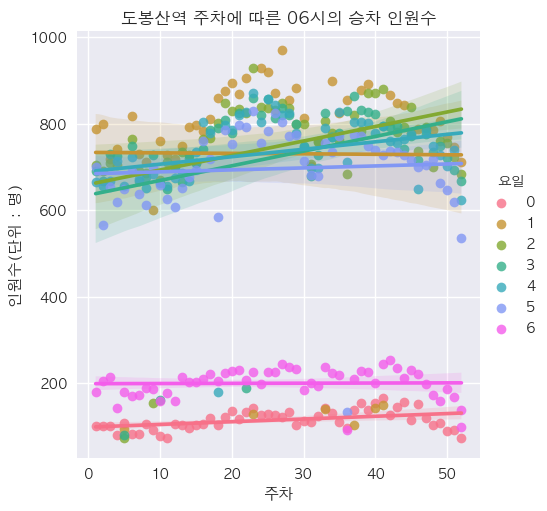

<Figure size 1400x500 with 0 Axes>

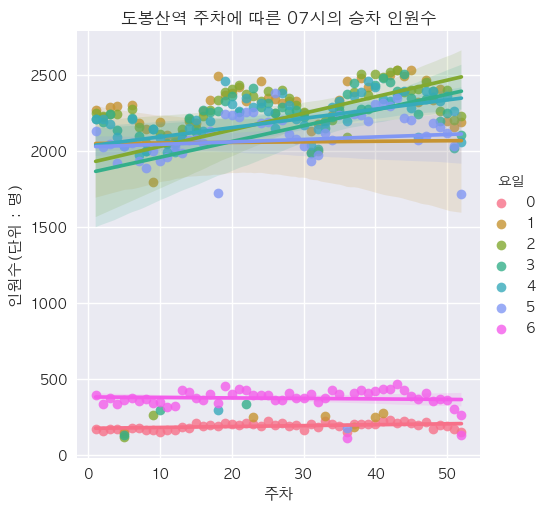

<Figure size 1400x500 with 0 Axes>

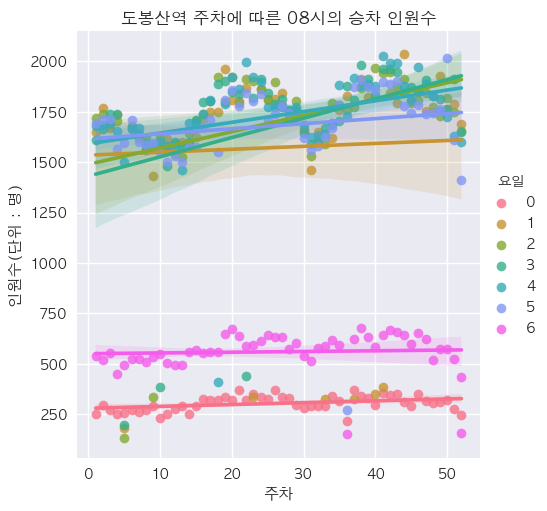

<Figure size 1400x500 with 0 Axes>

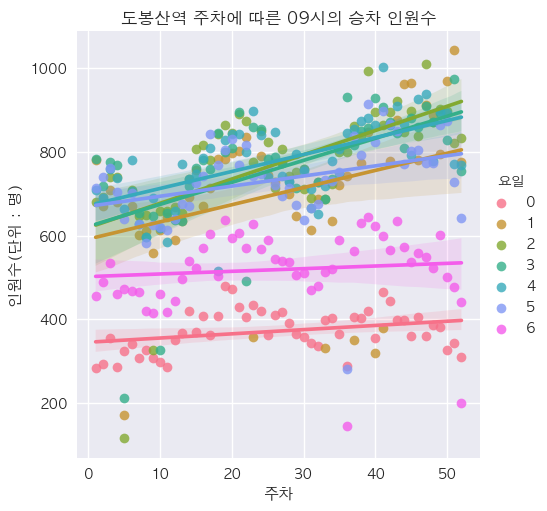

<Figure size 1400x500 with 0 Axes>

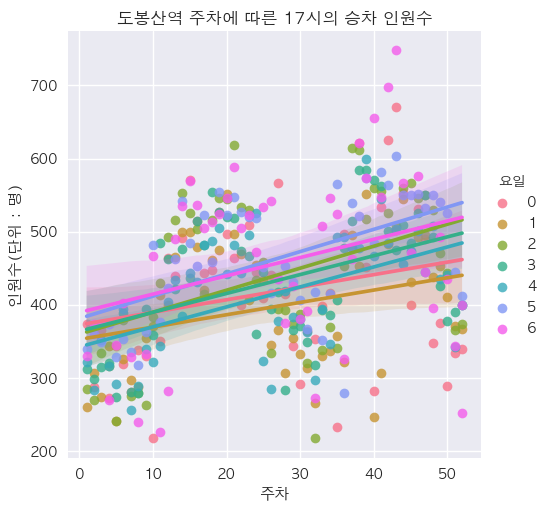

<Figure size 1400x500 with 0 Axes>

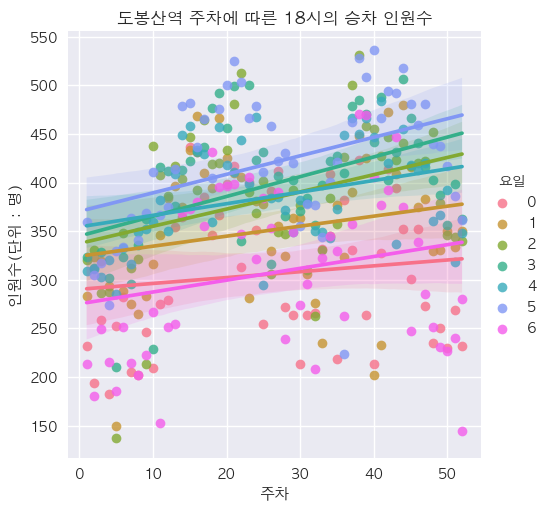

<Figure size 1400x500 with 0 Axes>

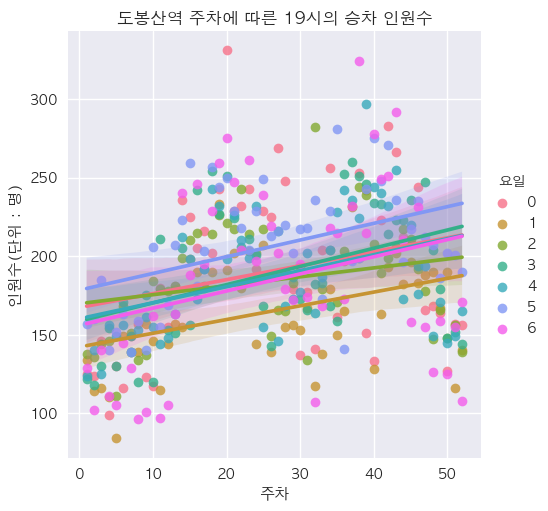

<Figure size 1400x500 with 0 Axes>

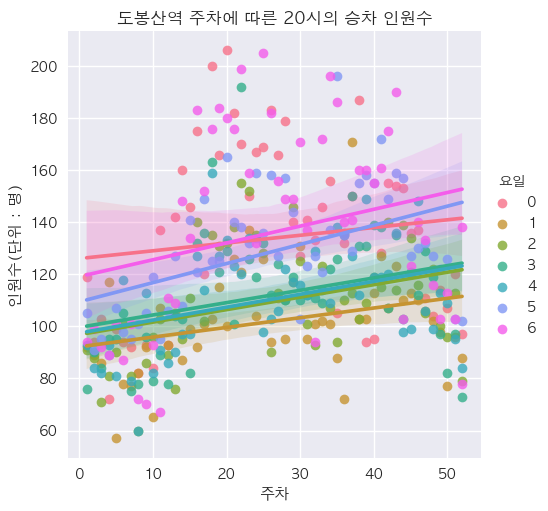

<Figure size 1400x500 with 0 Axes>

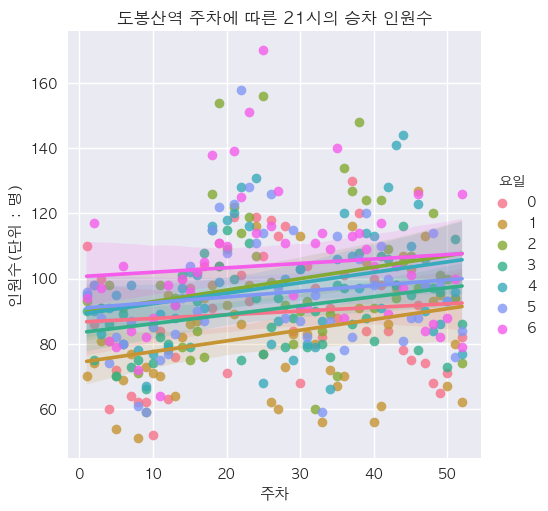

<Figure size 1400x500 with 0 Axes>

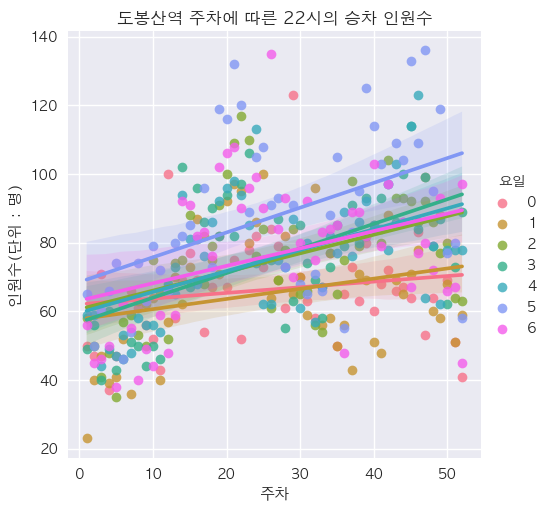

In [119]:
# 일단 출퇴근 시간대만 리스트로 가져온다. 
timeLists = ['06', '07', '08', '09', '17', '18', '19', '20', '21', '22']

## 도봉산 주차에 따른 05시 인원수 

for time in timeLists:
    plt.figure(figsize=(14, 5))
    sns.lmplot(
        x='주차',
        y=time,
        data=subway_7호선_도봉산_승차,
        hue='요일'
    )
    plt.title(f'도봉산역 주차에 따른 {time}시의 승차 인원수')
    plt.ylabel('인원수(단위 : 명)')
    plt.xlabel('주차')

    plt.show()

In [120]:
subway_7호선_도봉산_승차_일 = subway_7호선_도봉산_승차[subway_7호선_도봉산_승차['요일'] == 0] 
subway_7호선_도봉산_승차_월 = subway_7호선_도봉산_승차[subway_7호선_도봉산_승차['요일'] == 1] 
subway_7호선_도봉산_승차_화 = subway_7호선_도봉산_승차[subway_7호선_도봉산_승차['요일'] == 2] 
subway_7호선_도봉산_승차_수 = subway_7호선_도봉산_승차[subway_7호선_도봉산_승차['요일'] == 3] 
subway_7호선_도봉산_승차_목 = subway_7호선_도봉산_승차[subway_7호선_도봉산_승차['요일'] == 4] 
subway_7호선_도봉산_승차_금 = subway_7호선_도봉산_승차[subway_7호선_도봉산_승차['요일'] == 5] 
subway_7호선_도봉산_승차_토 = subway_7호선_도봉산_승차[subway_7호선_도봉산_승차['요일'] == 6] 

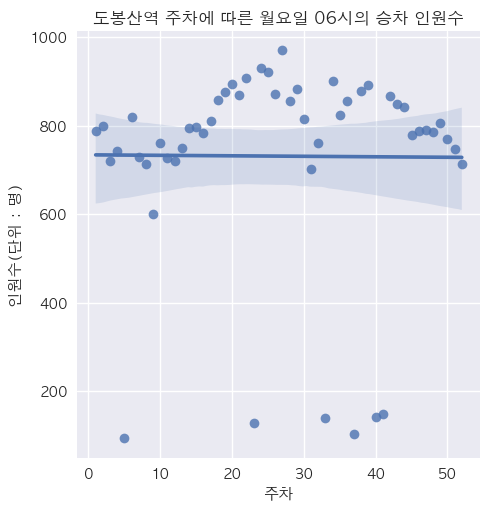

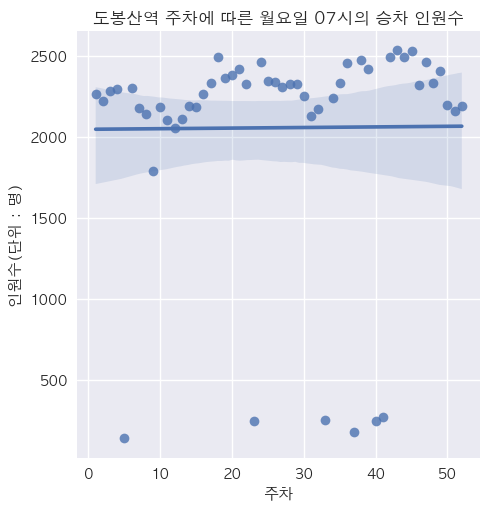

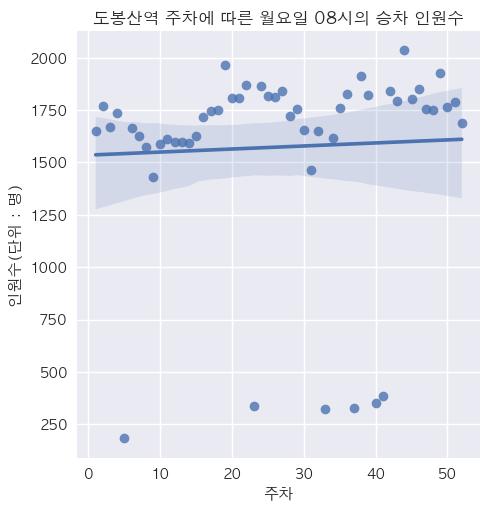

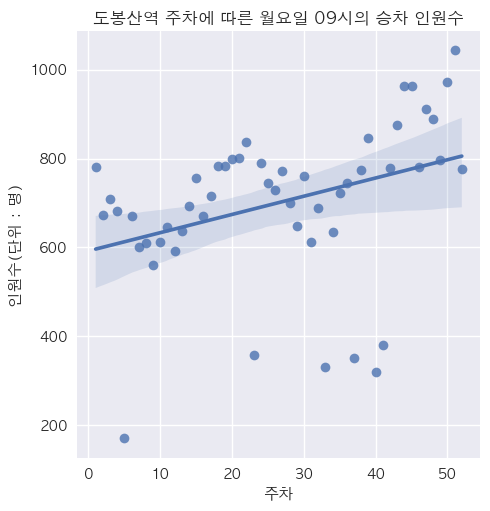

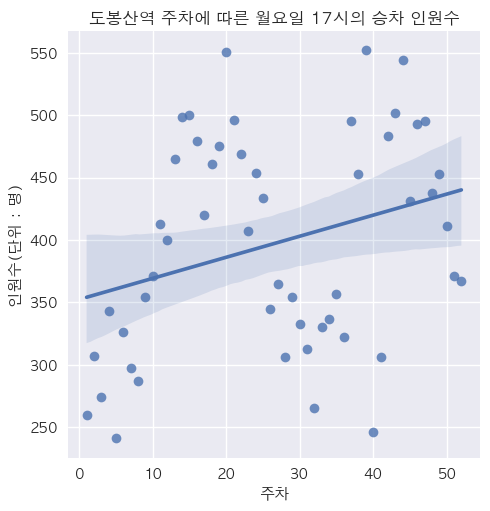

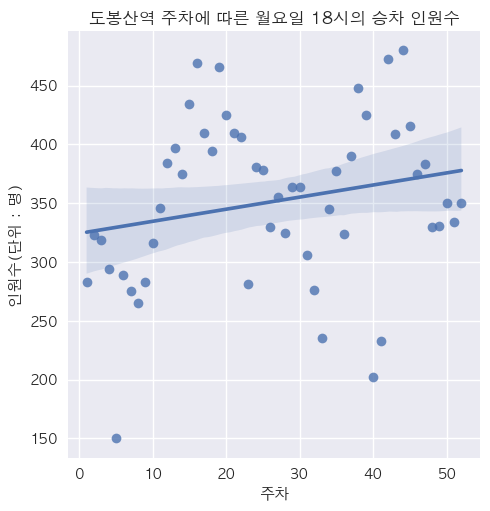

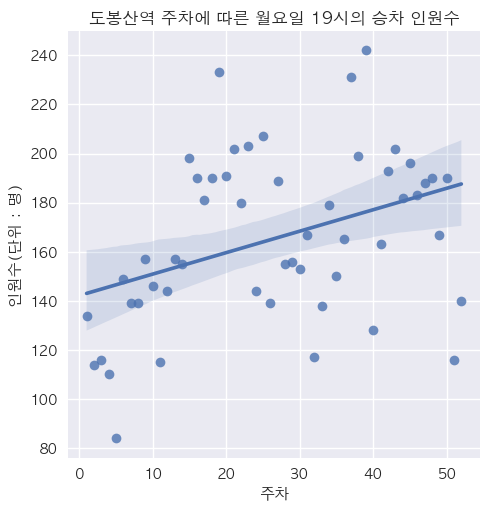

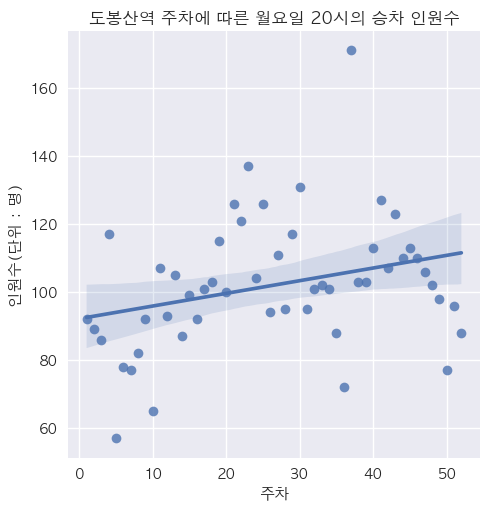

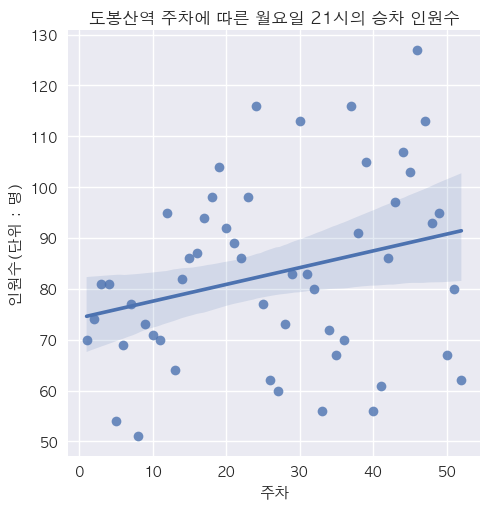

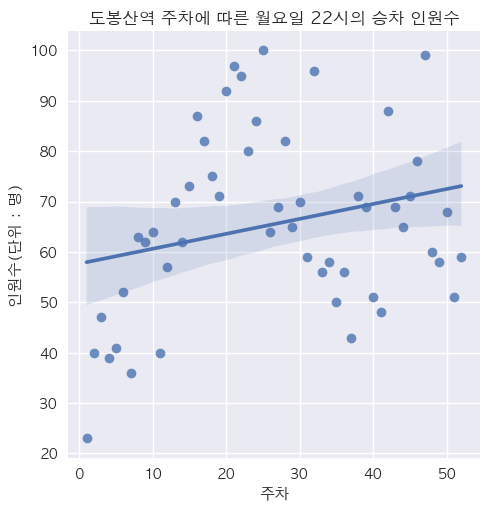

In [121]:
# 일단 출퇴근 시간대만 리스트로 가져온다. 
timeLists = ['06', '07', '08', '09', '17', '18', '19', '20', '21', '22']

## 도봉산 주차에 따른 05시 인원수 
for time in timeLists:
    sns.lmplot(
        x='주차',
        y=time,
        data=subway_7호선_도봉산_승차_월,

    )
    plt.title(f'도봉산역 주차에 따른 월요일 {time}시의 승차 인원수')
    plt.ylabel('인원수(단위 : 명)')
    plt.xlabel('주차')

    plt.show()

---
같은 주가 7개 있으니 데이터가 7개 찍힌다. 그래서 주차별 05시 탑승인원의 평균을 구해서 그려보자

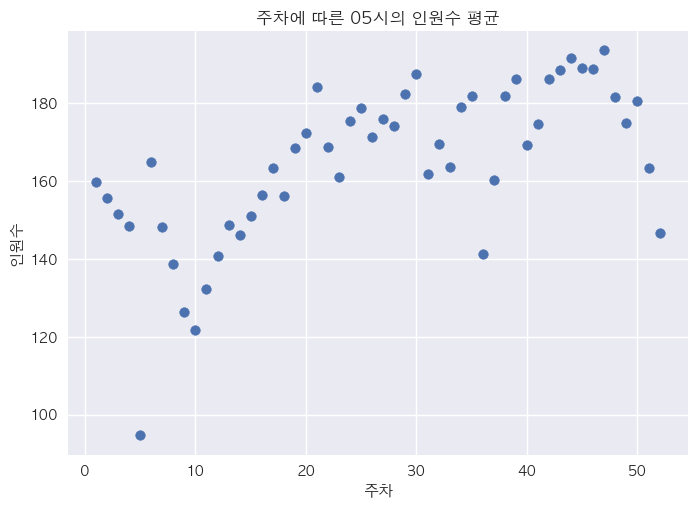

In [122]:
## 주차가 같은 날이 7개 있으니 주차별로 승객의 평균을 구해서 그려보자. 

# 주차별 인원수 평균
subway_7호선_도봉산_승차_05시= pd.pivot_table(subway_7호선_도봉산_승차, index='주차', values='05', aggfunc=np.mean)
# subway_7호선_도봉산_승차_05시.head()

plt.scatter(
    x=subway_7호선_도봉산_승차_05시.index,
    y='05',
    data=subway_7호선_도봉산_승차_05시
)
plt.title(f'주차에 따른 05시의 인원수 평균')
plt.ylabel('인원수')
plt.xlabel('주차')

plt.show()


선형회귀 그려볼까?

In [123]:
np.array(subway_7호선_도봉산_승차_05시.index)

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34,
       35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51,
       52])

In [124]:
from sklearn.model_selection import train_test_split

train_input, test_input, train_target, test_target =\
    train_test_split(np.array(subway_7호선_도봉산_승차_05시.index), subway_7호선_도봉산_승차_05시['05'].values)

# 1열로 구성된 배열로 재구성
train_input = train_input.reshape(-1, 1)
test_input = test_input.reshape(-1, 1)

print(train_input.shape, test_input.shape) #(42, 1) (14, 1)

from sklearn.neighbors import KNeighborsRegressor

knr = KNeighborsRegressor(n_neighbors=3)
knr.fit(train_input, train_target)

(39, 1) (13, 1)


KNeighborsRegressor(n_neighbors=3)

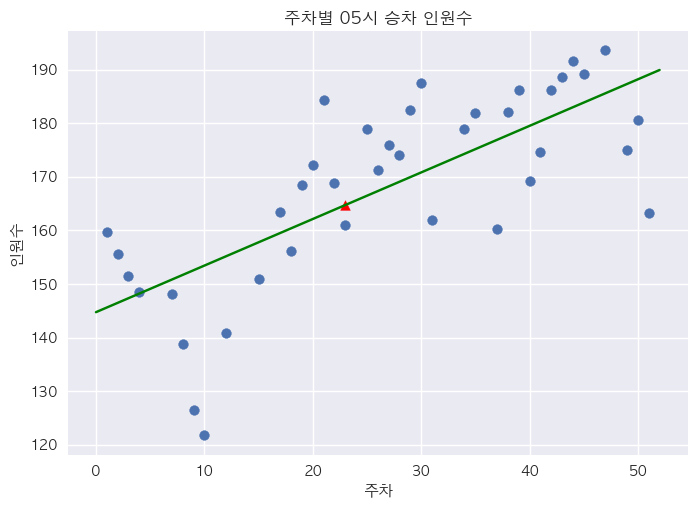

In [125]:
from sklearn.linear_model import LinearRegression

lr = LinearRegression()
lr.fit(train_input, train_target)

# plt.figure(figsize=(14,5))


# 산점도
plt.scatter(train_input, train_target)

#0에서 52까지의 1차 방정식
plt.plot([0, 52], [0*lr.coef_ + lr.intercept_, 52*lr.coef_ + lr.intercept_], c='green')

## 공식 : 주차 * lr.coef_ + lr.intercept_

## 현재 6월 5일 => 23주차, 현재 시간대가 05시로 승차인원수를 파악이 가능하다. 
plt.scatter(23, 23 * lr.coef_ + lr.intercept_, marker='^', c='red')

plt.title('주차별 05시 승차 인원수')
plt.xlabel('주차')
plt.ylabel('인원수')
plt.show()

### 현재 6월 5일 => 23주차, 현재 시간대가 05시로 승차인원수를 파악이 가능하다. 

In [126]:
print(lr.score(train_input, train_target))
print(lr.score(test_input, test_target))

0.5361025957123984
0.004681414993967237


> 엄청난 과대적합인디요? 회귀선을 곡선으로 그려보자!! 다항회귀로!!

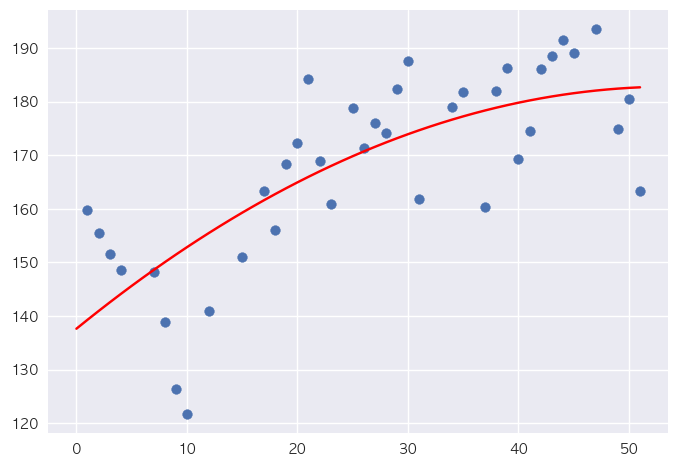

In [127]:
# Feature를 제공한 Column을 생성하여 기존의 Column에 붙인다.
train_poly = np.column_stack((train_input ** 2, train_input))
test_poly = np.column_stack((test_input ** 2, test_input))

# Model 생성
lr = LinearRegression()
lr.fit(train_poly, train_target)

# 23주차 예측
lr.predict([[23**2, 23]])

# 구간별 직선을 그리기 위해 15에서 49까지 정수 배열
point = np.arange(0, 52)

plt.scatter(train_input, train_target)

# 0에서 51까지의 2차 방정식 그래프
plt.plot(point, lr.coef_[0] *point**2 + lr.coef_[1]*point + lr.intercept_, c='red')


plt.plot(23, lr.coef_[0] *23**2 + lr.coef_[1]*23 + lr.intercept_, c='orange')

plt.show()

In [128]:
print("Training Score : ", lr.score(train_poly, train_target))
print("Test Score : ", lr.score(test_poly, test_target))

Training Score :  0.5681782344608985
Test Score :  0.09200420260739639


> 단순회귀보다 훨 씬 좋아짐 => 희망적!! 항을 늘려보잠    
> 산점도를 보니 오차항으로 늘려볼까?

Training score: 74.36660454779758
Testing score: 39.07085797758214


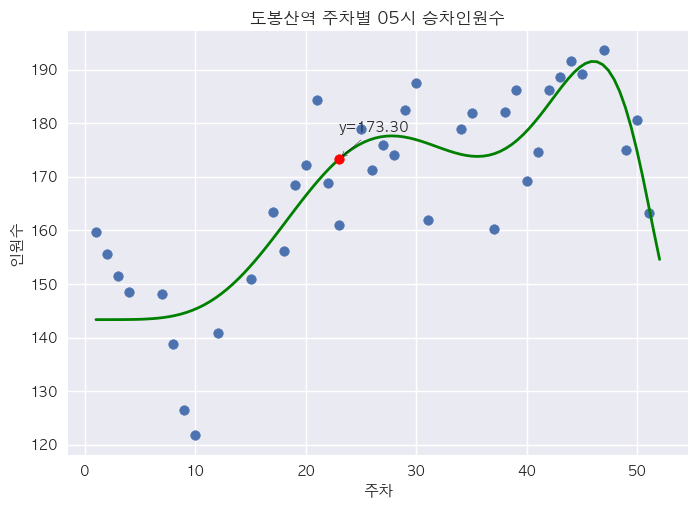

In [129]:
from sklearn.preprocessing import PolynomialFeatures

# x 에 대한 제곱근 (다항식 형태로 변환), degree : 5차방정식으로 만듦
poly_features  = PolynomialFeatures(degree=12, include_bias=False)

# 5차항에 대하여 feature
X_train_poly = poly_features.fit_transform(train_input)
X_test_poly = poly_features.transform(test_input)

lr = LinearRegression()
lr.fit(X_train_poly, train_target)

# 비교를 주차가 23일 때 y 값 계산
X_23 = np.array([[23]])
X_23_poly = poly_features.transform(X_23)
y_23 = lr.predict(X_23_poly)

# linspace(시작점, 끝점, 구간갯수)
X_new = np.linspace(1, 52, 100).reshape(-1, 1) 
X_new_poly = poly_features.transform(X_new)
y_new = lr.predict(X_new_poly)

# 모델평가
train_score = lr.score(X_train_poly, train_target)
test_score = lr.score(X_test_poly, test_target)
print(f'Training score: {train_score*100}')
print(f'Testing score: {test_score*100}')

# 그래프 그리기
plt.scatter(train_input, train_target)
plt.plot(X_new, y_new, 'g-', linewidth=2, label='Regression') # 'r-' : 빨간색 실선

# x=23일 때 점 추가
plt.scatter(23, y_23, color='red', zorder=5)
plt.annotate(f'y={y_23[0]:.2f}', xy=(23, y_23), xytext=(23, y_23+5),
        arrowprops=dict(facecolor='black', arrowstyle='->'))

plt.title('도봉산역 주차별 05시 승차인원수')
plt.xlabel('주차')
plt.ylabel('인원수')
plt.show()


In [130]:
subway_7호선_도봉산.columns

Index(['Unnamed: 0', '연번', '수송일자', '호선', '역사코드', '역명', '승하차구분', '05', '06',
       '07', '08', '09', '10', '11', '12', '13', '14', '15', '16', '17', '18',
       '19', '20', '21', '22', '23', '24', '요일', '년도', '월', '주차', '공휴일여부',
       '주중주말', '05시', '06시', '07시', '08시', '09시', '10시', '11시', '12시', '13시',
       '14시', '15시', '16시', '17시', '18시', '19시', '20시', '21시', '22시', '23시',
       '24시'],
      dtype='object')

In [131]:
subway_7호선_도봉산_승차['주중주말'].head()

626    DAY
628    DAY
630    DAY
632    DAY
634    DAY
Name: 주중주말, dtype: object

In [132]:
print(np.corrcoef(subway_7호선_도봉산_승차['09'], subway_7호선_도봉산_승차['공휴일여부']))
print(np.corrcoef(subway_7호선_도봉산_승차['09'], subway_7호선_도봉산_승차['주차']))
print(np.corrcoef(subway_7호선_도봉산_승차['09'], subway_7호선_도봉산_승차['요일']))
print(np.corrcoef(subway_7호선_도봉산_승차['09'], subway_7호선_도봉산_승차['월']))

[[1.       0.436941]
 [0.436941 1.      ]]
[[1.         0.26050925]
 [0.26050925 1.        ]]
[[1.         0.19177073]
 [0.19177073 1.        ]]
[[1.         0.28352446]
 [0.28352446 1.        ]]


> 공휴일여부보다는 요일과 상관관계가 높을 줄 알았는데 공휴일여부가 가장 높게 나옴.

In [133]:
subway_7호선_도봉산_승차.columns

Index(['Unnamed: 0', '연번', '수송일자', '호선', '역사코드', '역명', '승하차구분', '05', '06',
       '07', '08', '09', '10', '11', '12', '13', '14', '15', '16', '17', '18',
       '19', '20', '21', '22', '23', '24', '요일', '년도', '월', '주차', '공휴일여부',
       '주중주말', '05시', '06시', '07시', '08시', '09시', '10시', '11시', '12시', '13시',
       '14시', '15시', '16시', '17시', '18시', '19시', '20시', '21시', '22시', '23시',
       '24시'],
      dtype='object')

In [134]:
# 훈련데이터의 Feature와 target정하기
y = subway_7호선_도봉산_승차['09'].values
x = subway_7호선_도봉산_승차['공휴일여부'].values


# # w와 b를 초기화 하기  : 무작위로 그냥 weight와 Bias를 1로 선택
w = 1.0
b = 1.0 

# # # 훈련데이터의 첫번째 Sample 데이터로 y^ 계산하기
y_hat = x[0] * w + b
y_hat 

# # Target과 예측 데이터 비교하기
print(y_hat) # 1.0616962065186832
print(y[0]) # 151.0


1.0
200


----


In [135]:
import pandas as pd ,numpy as  np # Data manipulatioin
import seaborn as sns,matplotlib.pyplot as plt # visiulization
import warnings;warnings.filterwarnings('ignore') # 경고 무시 
# 기본 세팅
from Functions import Service 
Service.plotSetting()


___## OS platform 한글 세팅완료 ## ___


In [136]:
mlTable_승차 = pd.read_csv("../Data/FinalDataset/mlTable_승차.csv")
mlTable_하차 = pd.read_csv("../Data/FinalDataset/mlTable_하차.csv")
mlTable_하차.head()

input_column=['월', '주차', '공휴일', '요일', '역사코드', '주중', '주말',
    'latitude', 'longitude', '05배차', '06배차', '07배차', '08배차', '09배차', '10배차',
    '11배차', '12배차', '13배차', '14배차', '15배차', '16배차', '17배차', '18배차', '19배차',
    '20배차', '21배차', '22배차', '23배차', '24배차']
target_column=['05시인원', '06시인원', '07시인원',
    '08시인원', '09시인원', '10시인원', '11시인원', '12시인원', '13시인원', '14시인원', '15시인원',
    '16시인원', '17시인원', '18시인원', '19시인원', '20시인원', '21시인원', '22시인원', '23시인원',
    '24시인원']


training_table_승차 = mlTable_승차[input_column]
target_table_승차 = mlTable_승차[target_column]
training_table_하차 = mlTable_하차[input_column]
target_table_하차 = mlTable_하차[target_column]

----
knn

In [137]:
len(training_table_승차['역사코드'].unique()) * 7

294

In [183]:


# training_table_승차와 target_table_승차가 이미 정의되고 로드되었다고 가정

# 두 테이블을 병합
test = pd.concat([training_table_승차, target_table_승차], axis=1)

def station_name_to_code(line,station_name):
        import pandas as pd
        stations = pd.read_csv('../Data/SubwayInfo.csv')
        target_line_stations = stations[stations['호선']==line]
        row = target_line_stations[station_name == target_line_stations['역이름']]
        print(f"{station_name}의 역사 코드는 {row['역코드'].values[0]}입니다")
        return row['역코드'].values[0]

def sdtation_inout_lmplot(mlTable, line, station_name, time_passenger, day):
    import pandas as pd
    import matplotlib.pyplot as plt
    import seaborn as sns
    import numpy as np
    code = station_name_to_code(line, station_name)
    test = mlTable[mlTable['역사코드'] == code]

    # 숫자로 된 요일을 요일 이름으로 매핑
    day_mapping = {
        0: '일요일',
        1: '월요일',
        2: '화요일',
        3: '수요일',
        4: '목요일',
        5: '금요일',
        6: '토요일',
        7: '일요일'  # 0과 7이 모두 일요일이라고 가정
    }

    # 필터링된 데이터 프레임
    station_day = test[(test['역사코드'] == code) & (test['요일'] == day)].iloc[:,29:]

    # 주차와 관련된 열을 포함하도록 선택
    station_day_data = station_day.iloc[:, 29:].copy()
    station_day_data['주차'] = station_day['주차']

    # 최댓값의 절대값으로 나누기 
    for col in station_day_data.columns :
        if col != '주차':
            station_day_data[col] = station_day_data[col] / abs(station_day_data[col].max())


    # '요일' 컬럼을 요일 이름으로 매핑
    test['요일'] = test['요일'].map(day_mapping)
    
    # 요일별로 색깔을 지정하기 위해 팔레트를 설정
    palette = sns.color_palette("husl", len(day_mapping))
    
    # 요일별로 플롯을 나누기 위해 FacetGrid 사용
    g = sns.FacetGrid(test, col='요일', col_wrap=4, height=4, aspect=1, palette=palette)
    g.map_dataframe(sns.scatterplot, '주차', time_passenger, hue='요일', palette=palette)
    
    # 각 요일별로 색깔을 지정한 regplot 추가
    for ax in g.axes.flatten():
        day_name = ax.get_title().split('=')[-1].strip()
        day_data = test[test['요일'] == day_name]
        sns.regplot(
            x='주차',
            y=time_passenger,
            data=day_data,
            scatter=False,
            ax=ax,
            color=palette[list(day_mapping.values()).index(day_name)]
        )

        if day_mapping[day] == day_name:
            for col in station_day_data.columns:
                    sns.lineplot(
                        x = station_day_data['주차'],
                        y = station_day_data[col],
                        ax= ax,
                        legend=False,
                        color='black',
                        linestyle = '-'
                    )
            
    # 제목 설정
    g.set_titles(col_template="{col_name}")
    g.set_axis_labels('주차', '인원수(단위 : 명)')
    
    plt.subplots_adjust(top=0.9)
    g.fig.suptitle(f'{line} {station_name}역 : {time_passenger} 주차 vs 인원수')

    plt.show()



In [184]:
sdtation_inout_lmplot(test, '7호선', '도봉산', '18시인원', 0)

도봉산의 역사 코드는 2712입니다


KeyError: '주차'

In [165]:
# 역사별, 요일별 최댓값 찾기
station_day = test[(test['역사코드'] == 2712) & (test['요일'] == 0)].iloc[:,29:]

# 최댓값의 절대값으로 나누기 
station_day_data = station_day / abs(station_day.max())


In [200]:
## knn
def MultiOutputRegressorFunc(training_table, target_table):
    """
    # Description : train, target데이터에 대한 MultiOutputRegressor model
    # Date : 2024.06.05
    # Author : Shin Nara + pdg
    # Detail:
        * training_table (df): train data
        * target_table (df): target data
        * Returns: - 
    # Update:
        2024.06.07 by pdg : 머신러닝 함수 업데이트 
            * 주석 달았음. 
        2024.06.08 by ChatGPT : Validation 데이터셋 추가
            * 데이터를 훈련, 검증, 테스트로 나눔.
            * 검증 세트에서 모델 성능 평가.
    """
    import pandas as pd, numpy as np
    import matplotlib.pyplot as plt 
    from sklearn.model_selection import train_test_split
    from sklearn.multioutput import MultiOutputRegressor
    from sklearn.neighbors import KNeighborsRegressor

    # 데이터를 훈련, 검증, 테스트 세트로 나누기
    train_input, temp_input, train_target, temp_target = train_test_split(
        training_table, target_table, test_size=0.3, random_state=42)
    
    val_input, test_input, val_target, test_target = train_test_split(
        temp_input, temp_target, test_size=0.5, random_state=42)
    
    # KNN 회귀 모델 설정
    knn_regressor = KNeighborsRegressor(n_neighbors=3)
    multi_output_regressor = MultiOutputRegressor(knn_regressor)
    
    # 모델 훈련
    multi_output_regressor.fit(train_input, train_target)
    
    # 검증 세트에서 모델 성능 평가
    val_score = multi_output_regressor.score(val_input, val_target)
    print(f'Validation set score: {val_score}')
    
    # 테스트 세트에서 모델 성능 평가
    test_score = multi_output_regressor.score(test_input, test_target)
    print(f'Test set score: {test_score}')
    
    # 예측값 출력 (테스트 세트에서 상위 5개 예측값)
    predictions = multi_output_regressor.predict(test_input)
    # print(predictions[:5])
    
    return multi_output_regressor

# 함수 사용 예시:
MultiOutputRegressorFunc(training_table_승차, target_table_승차)


1


Validation set score: 0.7432376696823677
Test set score: 0.6847041235627865
3
Validation set score: 0.8109185117601256
Test set score: 0.8013602626205053
5
Validation set score: 0.7783983177786811
Test set score: 0.7724190837489437
7
Validation set score: 0.7458758435607747
Test set score: 0.7450049406667081
9
Validation set score: 0.7202681253370271
Test set score: 0.7169451411846559
11
Validation set score: 0.6966199580933783
Test set score: 0.6917782085568559
13
Validation set score: 0.6744072686907183
Test set score: 0.6705187626270944
15
Validation set score: 0.6575682573079547
Test set score: 0.6551130594283758
17
Validation set score: 0.6386612452561773
Test set score: 0.6414933107470595
19
Validation set score: 0.6208645401042737
Test set score: 0.6275145584069752


MultiOutputRegressor(estimator=KNeighborsRegressor(n_neighbors=19))

In [202]:
### k-fold 
def MultiOutputRegressorFunc(training_table, target_table):
    """
    # Description : train, target데이터에 대한 MultiOutputRegressor model
    # Date : 2024.06.05
    # Author : Shin Nara + pdg
    # Detail:
        * training_table (df): train data
        * target_table (df): target data
        * Returns: - 
    # Update:
        2024.06.07 by pdg : 머신러닝 함수 업데이트 
            * 주석 달았음. 
        2024.06.08 by ChatGPT : k-폴드 교차 검증 추가
            * k-폴드 교차 검증을 통해 모델 성능 평가.
    """
    import pandas as pd, numpy as np
    import matplotlib.pyplot as plt 
    from sklearn.model_selection import KFold
    from sklearn.multioutput import MultiOutputRegressor
    from sklearn.neighbors import KNeighborsRegressor
    from sklearn.metrics import r2_score

    # KNN 회귀 모델 설정
    knn_regressor = KNeighborsRegressor(n_neighbors=5)
    multi_output_regressor = MultiOutputRegressor(knn_regressor)

    # k-폴드 교차 검증 설정
    kf = KFold(n_splits=5, shuffle=True, random_state=42)
    
    val_scores = []
    test_predictions = []
    
    # k-폴드 교차 검증 반복
    for train_index, test_index in kf.split(training_table):
        train_input, test_input = training_table.iloc[train_index], training_table.iloc[test_index]
        train_target, test_target = target_table.iloc[train_index], target_table.iloc[test_index]
        
        # 모델 훈련
        multi_output_regressor.fit(train_input, train_target)
        
        # 검증 세트에서 모델 성능 평가
        predictions = multi_output_regressor.predict(test_input)
        score = r2_score(test_target, predictions)
        val_scores.append(score)
        
        test_predictions.append(predictions)
        
        print(f'Fold score: {score}')
    
    # k-폴드 검증의 평균 점수 출력
    mean_score = np.mean(val_scores)
    print(f'Mean validation score: {mean_score}')
    
    return multi_output_regressor, test_predictions

# 함수 사용 예시:
MultiOutputRegressorFunc(training_table_승차, target_table_승차)


Fold score: 0.784781583324998
Fold score: 0.7790498371721002
Fold score: 0.7909781766644068
Fold score: 0.7820883982762236
Fold score: 0.7809359586464608
Mean validation score: 0.7835667908168379


(MultiOutputRegressor(estimator=KNeighborsRegressor()),
 [array([[4.4000e+01, 1.9740e+02, 4.8220e+02, ..., 8.0000e+00, 4.4000e+00,
          6.0000e-01],
         [4.8600e+01, 2.1100e+02, 5.5360e+02, ..., 8.6000e+00, 2.4000e+00,
          0.0000e+00],
         [2.8200e+01, 1.2040e+02, 2.9680e+02, ..., 7.2000e+00, 3.0000e+00,
          0.0000e+00],
         ...,
         [2.0880e+02, 4.0180e+02, 9.9300e+02, ..., 8.7800e+01, 5.3000e+01,
          5.6000e+00],
         [2.6640e+02, 5.0680e+02, 1.3888e+03, ..., 1.3440e+02, 5.5600e+01,
          1.8200e+01],
         [2.1580e+02, 4.7220e+02, 1.2430e+03, ..., 1.2820e+02, 7.0000e+01,
          1.2600e+01]]),
  array([[  59.4,  244. ,  662.4, ...,    8.4,    3.2,    0. ],
         [  39.2,  160.6,  407.2, ...,    9. ,    3.4,    0. ],
         [  57.8,  248. ,  658.6, ...,   10.6,    3.4,    0. ],
         ...,
         [ 261.4,  505.6, 1390.6, ...,  147.2,   59.2,   13.6],
         [ 234.6,  511. , 1353.2, ...,  126.2,   77. ,   11.2],
      